In [1]:
library(splines)
library(gam)
library(ISLR) 
attach(Wage)

Loading required package: foreach
Loaded gam 1.20



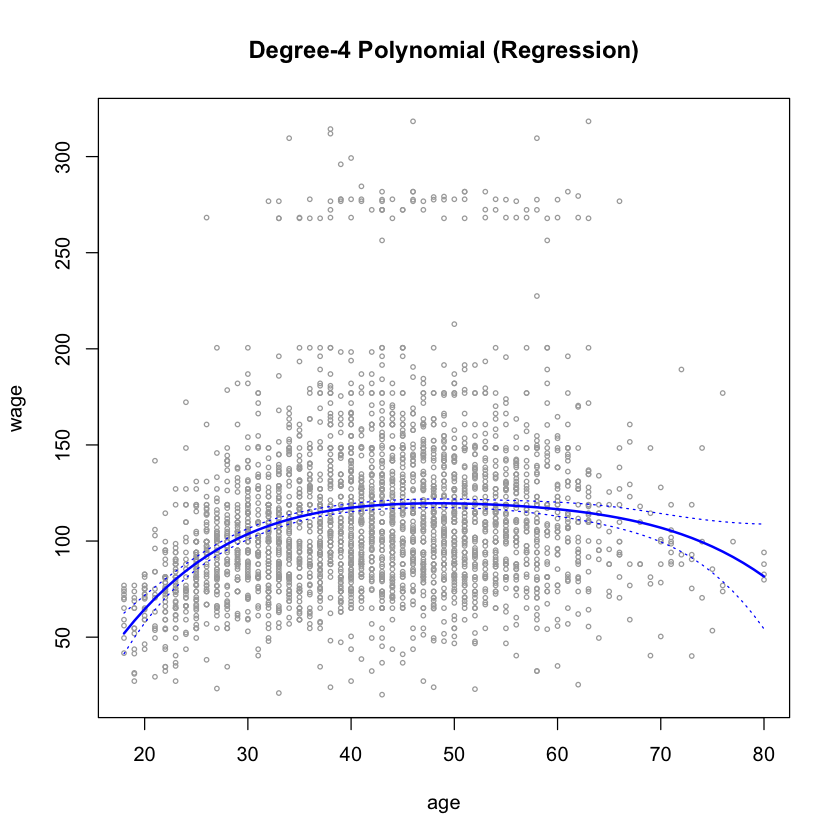

In [2]:
# Polynomial Regression: Regression problem 
poly_model = lm(wage ~ poly(age, 4), data = Wage)

age_range = range(age)                     
age_grid = seq(age_range[1], age_range[2]) 
preds = predict(poly_model, newdata = list(age = age_grid), se = TRUE)
se_bands = cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)

plot(age, wage, xlim = age_range, cex = 0.5, col = "darkgrey")
title("Degree-4 Polynomial (Regression)")
lines(age_grid, preds$fit, lwd = 2, col = "blue")            # Blue solid line: Fitted values 
matlines(age_grid, se_bands, lwd = 1, lty = 3, col = "blue") # Blue dotted line: 2-SE bands (1st (2nd) column of x is plotted against 1st (2nd) column of y)

In [3]:
# The degree of the polynomial to use
## Method 1: Cross-validation
## Method 2: ANOVA: Analysis Of Variance (F-Test)
## H0: Simple M1 is sufficient to explain the data; H1: Complex M2 is required to explain the data
model_1 = lm(wage ~ age, data = Wage)
model_2 = lm(wage ~ poly(age, 2), data = Wage) 
model_3 = lm(wage ~ poly(age, 3), data = Wage) 
model_4 = lm(wage ~ poly(age, 4), data = Wage) 
model_5 = lm(wage ~ poly(age, 5), data = Wage) 

## M2 > M1
## M3 > M2 
## M3 ~ M4
## M4 > M5
anova(model_1, model_2, model_3, model_4, model_5)

Res.Df RSS     Df Sum of Sq  F           Pr(>F)      
1 2998   5022216 NA         NA          NA           NA
2 2997   4793430  1 228786.010 143.5931074 2.367734e-32
3 2996   4777674  1  15755.694   9.8887559 1.679213e-03
4 2995   4771604  1   6070.152   3.8098134 5.104623e-02
5 2994   4770322  1   1282.563   0.8049758 3.696820e-01

          [,1]       [,2]
1  -6.15772761 -30.718653
2  -5.88632927 -26.904575
3  -5.63082344 -23.490468
4  -5.39061140 -20.448881
5  -5.16504176 -17.753350
6  -4.95339252 -15.378416
7  -4.75484455 -13.299654
8  -4.56844271 -11.493710
9  -4.39303896  -9.938360
10 -4.22721266  -8.612586
11 -4.06917117  -7.496679
12 -3.91666991  -6.572317
13 -3.76710261  -5.822476
14 -3.61815874  -5.230771
15 -3.46962324  -4.779658
16 -3.32592592  -4.447882
17 -3.19648780  -4.210135
18 -3.09160637  -4.041166
19 -3.01750061  -3.920740
20 -2.97477621  -3.835169
21 -2.95967044  -3.776070
22 -2.96589002  -3.738526
23 -2.98613078  -3.719567
24 -3.01327905  -3.716968
25 -3.04141251  -3.728246
26 -3.06648071  -3.749986
27 -3.08640099  -3.777737
28 -3.10055286  -3.806524
29 -3.10902601  -3.831595
30 -3.11200549  -3.849041
31 -3.10942515  -3.856138
32 -3.10082880  -3.851487
33 -3.08535016  -3.835038
34 -3.06177402  -3.808022
35 -3.02870228  -3.772790
36 -2.98488234  -3.732482
37 -2.92971892  -3.690519
38 -2.863853

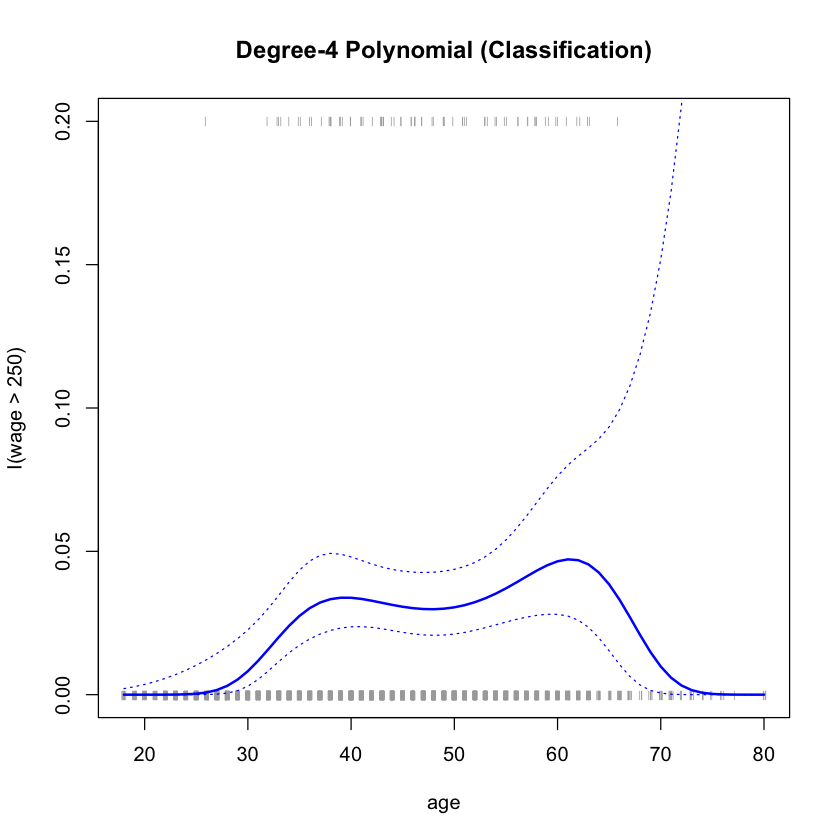

In [4]:
# Polynomial Regression: Classification problem 
poly_model = glm(I(wage > 250) ~ poly(age, 4), data = Wage, family = binomial)

age_range = range(age)                     
age_grid = seq(age_range[1], age_range[2]) 

# Prediction: 
## Default: Logit (Log-Odds) = X * Beta
## Transformation: Prob = exp(X * Beta) / (1 + exp(X * Beta))
preds_log = predict(poly_model, newdata = list(age = age_grid), se = TRUE) 
se_bands_log = cbind(preds_log$fit + 2 * preds_log$se.fit, preds_log$fit - 2 * preds_log$se.fit)
print(se_bands_log)

preds_p = exp(preds_log$fit) / (1 + exp(preds_log$fit))
se_bands_p = exp(se_bands_log) / (1 + exp(se_bands_log))
print(se_bands_p)

plot(age, I(wage > 250), xlim = age_range, type = "n", ylim = c(0, 0.2))           
title("Degree-4 Polynomial (Classification)")
points(jitter(age), I((wage > 250) / 5), cex = 0.5, pch = "|", col =" darkgrey ")  # Data points  
lines(age_grid, preds_p, lwd = 2, col = "blue")                                    # Blue solid line: Predicted probs
matlines(age_grid, se_bands_p, lwd = 1, lty = 3, col = "blue")                     # Blue dotted line: 2-SE bands

In [5]:
# Step function
print(cut(age, 4)[1:5])                        # Divides the range of variable into intervals  
table(cut(age, 4))

step_fn = lm(wage ~ cut(age, 4), data = Wage)  # Ordered categorical variable => Sets of dummy variables 
coef(summary(step_fn))                         # Intercept: Average salary for age < 33.5; Other coefs: Average additional salary in respective age group

[1] (17.9,33.5] (17.9,33.5] (33.5,49]   (33.5,49]   (49,64.5]  
Levels: (17.9,33.5] (33.5,49] (49,64.5] (64.5,80.1]



(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

Estimate  Std. Error t value   Pr(>|t|)    
(Intercept)            94.158392 1.476069   63.789970 0.000000e+00
cut(age, 4)(33.5,49]   24.053491 1.829431   13.148074 1.982315e-38
cut(age, 4)(49,64.5]   23.664559 2.067958   11.443444 1.040750e-29
cut(age, 4)(64.5,80.1]  7.640592 4.987424    1.531972 1.256350e-01

In [6]:
# Polynomial splines: Generates a basis matrix for representing the family of piecewise polynomials with the specified interior knots and degree
## bs(x, df = NULL, knots = NULL, degree = 3, intercept = FALSE, Boundary.knots = range(x))
## df: df - degree (-1 (Intercept)) knots at suitable quantiles of x
## knots: Internal breakpoints that define the spline; The default is NULL, which results in a basis for ordinary polynomial regression
## degree: Degree of the piecewise polynomial; The default is 3 for cubic splines

# Natural splines: Generates a basis matrix for representing the family of piecewise-cubic splines with the specified interior knots and the natural boundary conditions (Constraint that the function is linear beyond the boundary knots)
## ns(x, df = NULL, knots = NULL, intercept = FALSE, Boundary.knots = range(x))
## df: df - 1 - intercept knots at suitably chosen quantiles of x
## knots: The default is no knots; Together with the natural boundary conditions, resulting in a basis for linear regression on x

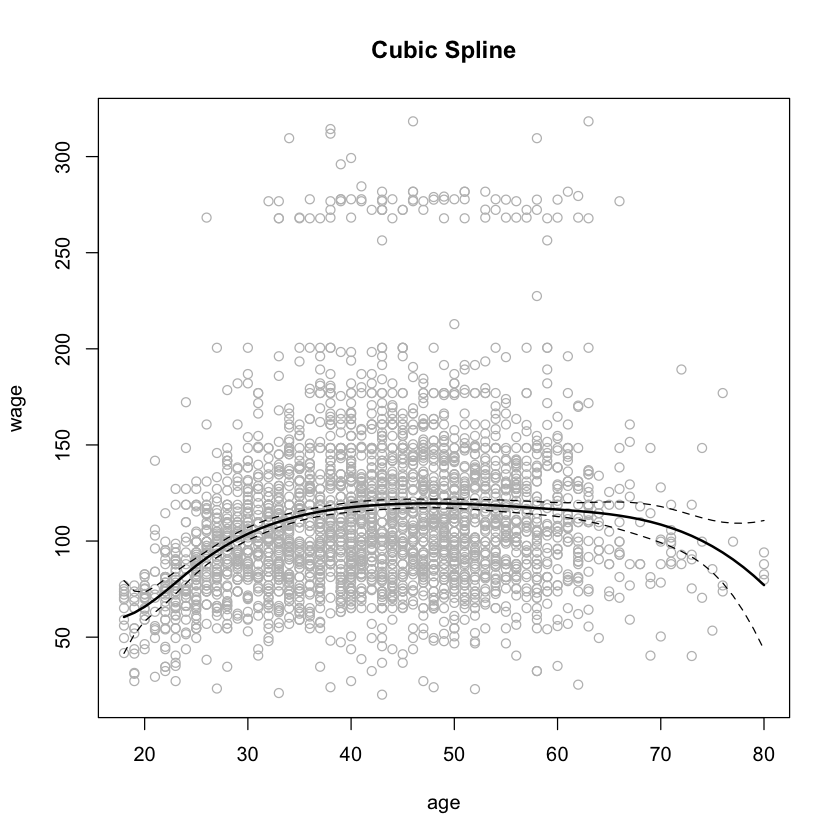

In [7]:
# Polynomial spline
spline_model = lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

age_range = range(age)                     
age_grid = seq(age_range[1], age_range[2])
pred = predict(spline_model, newdata = list(age = age_grid), se = TRUE)

plot(age, wage, col = "gray")
title("Cubic Spline")
lines(age_grid, pred$fit, lwd = 2)
lines(age_grid, pred$fit + 2 * pred$se, lty = "dashed")
lines(age_grid, pred$fit - 2 * pred$se, lty = "dashed")

In [8]:
# Degrees of freedom
dim(bs(age, knots = c(25, 40, 60)))  # Specify knots to produce knots at desired cut points  
dim(bs(age, df = 6))                 # Specify df to produce knots at uniform quantiles of the data
attr(bs(age, df = 6), "knots")

[1] 3000    6

[1] 3000    6

25%   50%   75% 
33.75 42.00 51.00

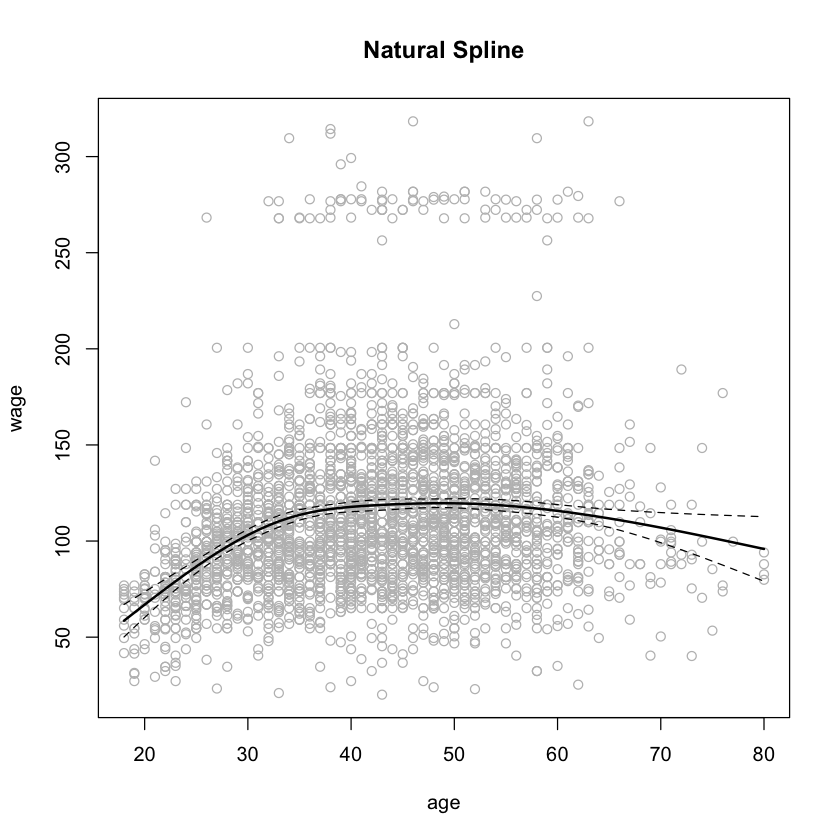

In [9]:
# Natural spline 
ns_spline_model = lm(wage ~ ns(age, df = 4), data = Wage)

age_range = range(age)                     
age_grid = seq(age_range[1], age_range[2])
pred = predict(ns_spline_model, newdata = list(age = age_grid), se = T)

plot(age, wage, col = "gray")
title("Natural Spline")
lines(age_grid, pred$fit, lwd = 2)
lines(age_grid, pred$fit + 2 * pred$se, lty = "dashed")
lines(age_grid, pred$fit - 2 * pred$se, lty = "dashed")

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

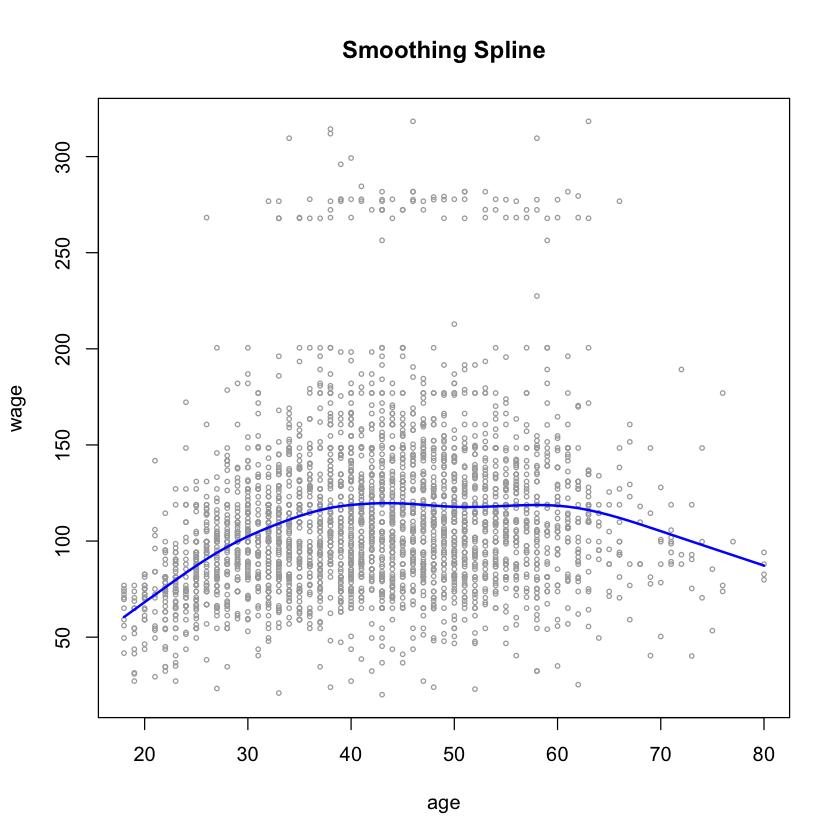

In [10]:
# Smoothing spline (Smoothness level chosen by cross-validation)
sm_spline_model = smooth.spline(age, wage, cv = TRUE)

plot(age, wage, xlim = age_range, cex = 0.5, col = "darkgrey")
title ("Smoothing Spline")
lines(sm_spline_model, col = "blue", lwd = 2)

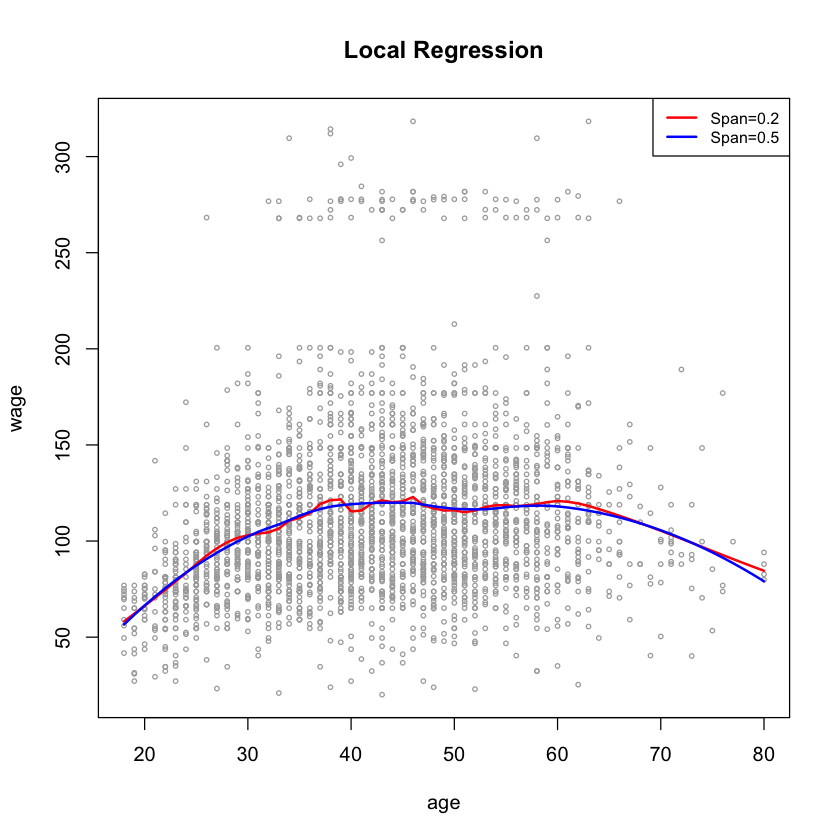

In [11]:
# Local regression
local_reg_model_1 = loess(wage ~ age, span = 0.2, data = Wage)  # Each neighborhood consists of 20% of the observations
local_reg_model_2 = loess(wage ~ age, span = 0.5, data = Wage)  # Each neighborhood consists of 50% of the observations

plot(age, wage, xlim = age_range, cex = 0.5, col = "darkgrey")
title("Local Regression")
  
lines(age_grid, predict(local_reg_model_1, data.frame(age = age_grid)), col = "red", lwd = 2)   # Small span: Wiggly
lines(age_grid, predict(local_reg_model_2, data.frame(age = age_grid)), col = "blue", lwd = 2)  # Large span: Smooth
legend("topright", legend = c("Span=0.2", "Span=0.5"), col = c("red", "blue"), lty = 1, lwd = 2, cex = 0.8)

In [12]:
# Generalized additive models (GAMs)
## Model 1: Y ~ smoothing spline function of age + education (Excluding year)
## Model 2: Y ~ smoothing spline function of age + year + education (Linear year)
## Model 3: Y ~ smoothing spline function of year and age + education (Non-linear year)
gam_1 = gam(wage ~ s(age, 5) + education, data = Wage)
gam_2 = gam(wage ~ s(age, 5) + year + education, data = Wage)
gam_3 = gam(wage ~ s(age, 5) + s(year, 4) + education, data = Wage)
print(anova(gam_1, gam_2, gam_3))

Analysis of Deviance Table

Model 1: wage ~ s(age, 5) + education
Model 2: wage ~ s(age, 5) + year + education
Model 3: wage ~ s(age, 5) + s(year, 4) + education
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1      2990    3711731                          
2      2989    3693842  1  17889.2 0.0001419 ***
3      2986    3689770  3   4071.1 0.3483897    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call: gam(formula = wage ~ s(age, 5) + s(year, 4) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(age, 5)     1  200684  200684 162.406 < 2.2e-16 ***
s(year, 4)    1   21817   21817  17.655 2.725e-05 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(age, 5)         4 32.380 <2e-16 ***
s(year, 4)        3  1.086 0.3537    
education                            
--

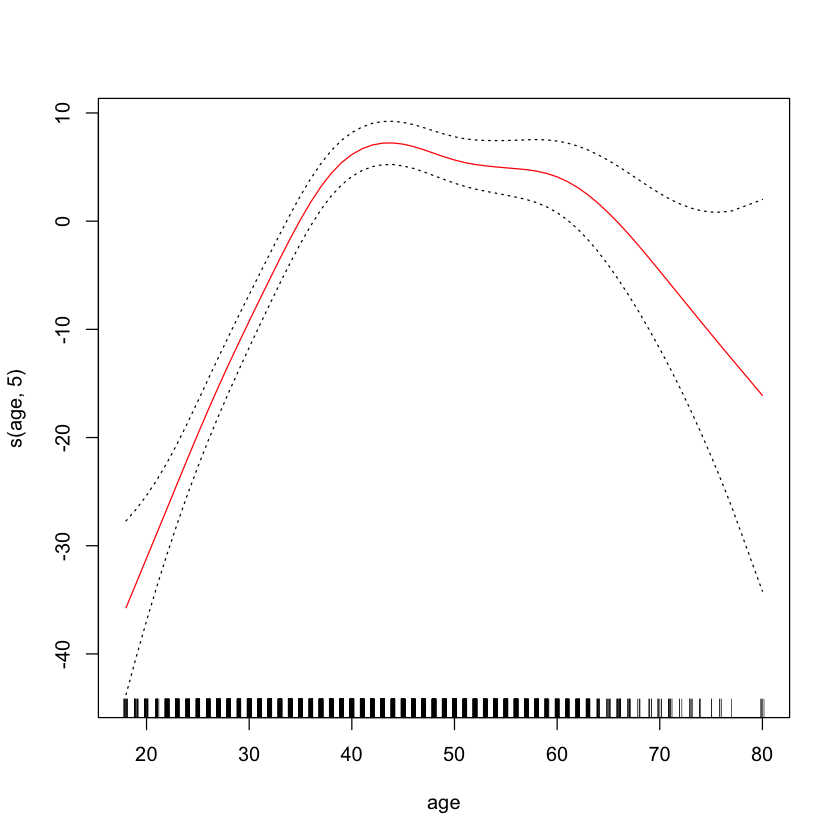

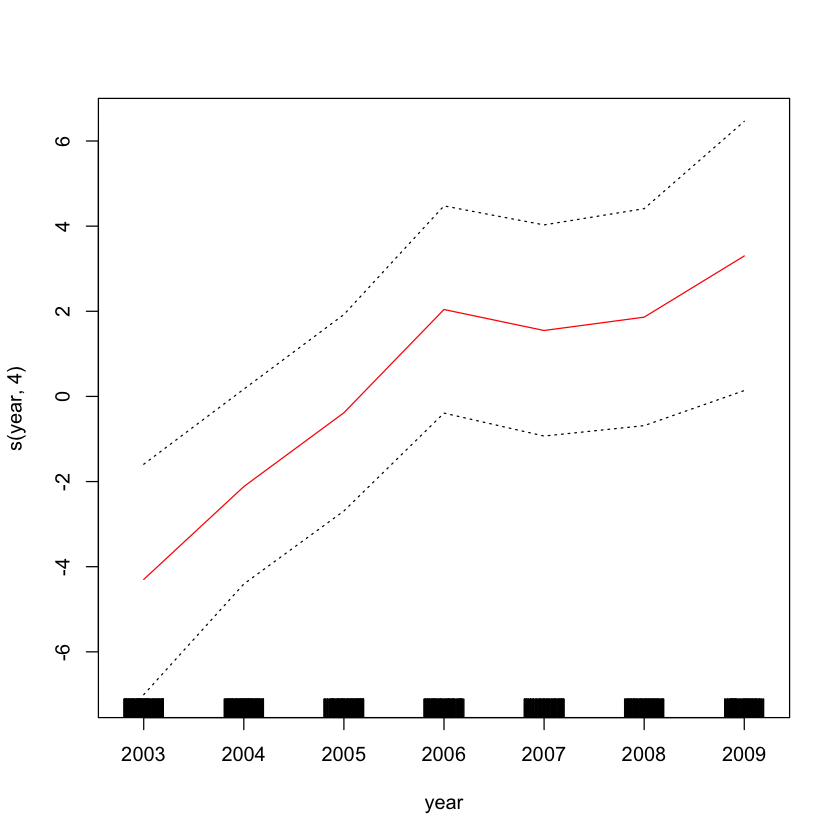

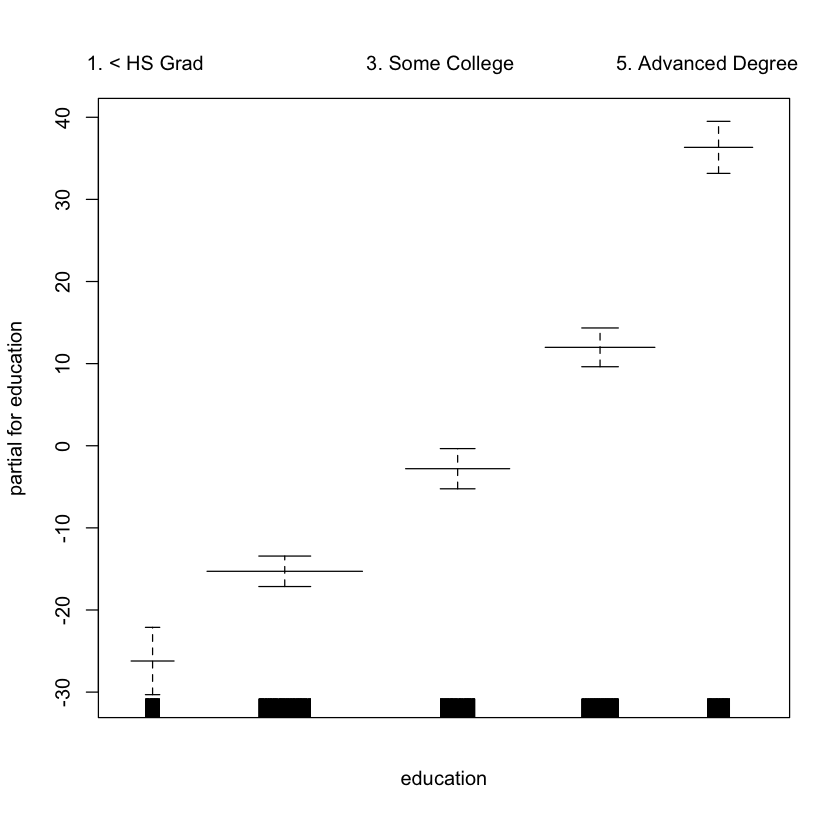

In [13]:
# H0: Linear relationship of predictor; H1: Non-linear relationship of predictor
# For age, choose non-linear function
# For year, choose linear function
summary(gam_3)
plot(gam_3, se = T, col = "red")

In [14]:
# Other building blocks 
## Local regression without interaction 
gam_lo_1 = gam(wage ~ s(year, df = 4) + lo(age, span = 0.7) + education, data = Wage)

## Local regression with interaction
gam_lo_2 = gam(wage ~ lo(year, age, span = 0.5) + education, data = Wage)

## Logistic regression gam 
gam_lr = gam(I(wage > 250) ~ year + s(age, df = 5) + education, family = binomial, data = Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”